In this notebook, we will use sklearn's make_moon sample dataset and train a RandomForest model using GridSearchCV.

In [16]:
import os
import pandas as pd
from pathlib import Path

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score


In [17]:
%matplotlib inline

In [18]:
from templates.experiment_tracking.train_baseline import create_decision_boundary_figure

Create sample dataset

In [19]:
def create_dataset(data_dir):
    """Generate data from make_moons and save it to a folder.
    """
    X, y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=42)
    df = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "y": y})
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

    df_train.to_csv(data_dir/"train.csv", index=False)
    df_test.to_csv(data_dir/"test.csv", index=False)

In [20]:
# Create directory for saving the data
DATA_DIR = Path("data/")
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Create the dataset
create_dataset(DATA_DIR)

In [21]:
# Read the data from the file
df_train = pd.read_csv(DATA_DIR/'train.csv')
df_test = pd.read_csv(DATA_DIR/'test.csv')

Model hyperparameters

In [22]:
# We define the hyperparameters we want to tune
param_grid = {
    "n_estimators": [10, 25, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 5, 10, None],
}
n_cross_vals = 5
print("Hyper-parameters:")
for param, value in param_grid.items():
    print(f"gridsearch-{param}", str(value))

Hyper-parameters:
gridsearch-n_estimators [10, 25, 100]
gridsearch-criterion ['gini', 'entropy']
gridsearch-max_depth [2, 5, 10, None]


Model training

In [23]:
# We will use RandomForest with GridSearchCV.
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=n_cross_vals, n_jobs=-1)

# We train the model
grid_search.fit(df_train[["x1", "x2"]], df_train["y"])
model = grid_search.best_estimator_

In [24]:
# Here we evaluate the model
predictions = model.predict(df_test[["x1", "x2"]])
test_accuracy = accuracy_score(df_test["y"], predictions)

In [25]:
# We log the selected hyper-parameters to locally
print("Selected hyper-parameters:")
for k, v in grid_search.best_params_.items():
    print(f"selected-{k}", v)

# We log the accuracy to locally
print("Metrics:")
print("accuracy", test_accuracy)


Selected hyper-parameters:
selected-criterion gini
selected-max_depth None
selected-n_estimators 25
Metrics:
accuracy 0.97


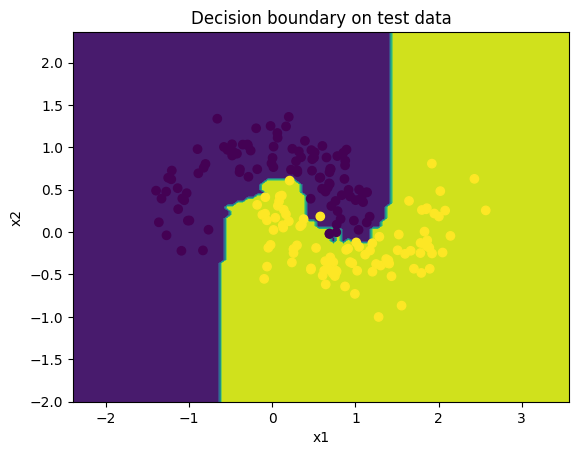

In [26]:
figure = create_decision_boundary_figure(model, df_test, return_figure=False)